In [1]:
from math import *
from numpy import *
from scipy import *
import numpy.random as nprandom


from pylab import *



In [22]:
# The data we will fit:
#  x, y, sigma_y
data1 = array([[201,592,61],[244,401,25],[47,583,38],[287,402,15],[203,495,21],
      [58,173,15],[210,479,27],[202,504,14],[198,510,30],[158,416,16],
       [165,393,14],[201,442,25],[157,317,52],[131,311,16],[166,400,34],
      [160,337,31],[186,423,42],[125,334,26],[218,533,16],[146,344,22]])

# plotting limits
xlimits = [0,250]
ylimits = [100,600]
title_prefix = 'Problem set 1'
plot_format = '.png'

In [19]:
def get_data_no_outliers():
    # pull out the x, y, and sigma_y columns, which have been packed into the
    # "data1" matrix.  "data1" has shape (20,3).  ":" means "everything in
    # that dimension".  Some of the first 5 points are outliers so for this
    # part we only grab from index 5 on, with magic "5:"
    x = data1[5:,0]
    y = data1[5:,1]
    sigmay = data1[5:,2]
    return (x, y, sigmay)


In [20]:
# Plot data with error bars, standard axis limits, etc.
def plot_yerr(x, y, sigmay):
    # plot data with error bars
    errorbar(x, y, yerr=sigmay, fmt='.', ms=7, lw=1, color='k')
    # if you put '$' in you can make Latex labels
    xlabel('$x$')
    ylabel('$y$')
    xlim(*xlimits)
    ylim(*ylimits)
    title(title_prefix)

In [23]:
# Plot a   y = mx + b  line.
def plot_line(b, m):
	x = array(xlimits)
	y = b + m*x
	plot(x, y, 'k-', alpha=0.5)
	xlim(*xlimits)
	ylim(*ylimits)

In [9]:
def straight_line_gaussian_likelihood(x, y, sigmay, m, b):

    pi = np.pi
    mu = m*x + b

    c = 1/((sqrt(2*pi))*sigmay)
    #print c ; c is for the normalisation of the pdf

    argument = -0.5*( (y - mu)/(sigmay) )**2
    #print argument

    d = c*exp(argument)
    e = exp(0)
    #print e

    dd = prod(d)

    return dd

In [13]:
def testing():
    (x, y, sigmay) = get_data_no_outliers()
    (m,b) = (2.2,30)
    #(m,b) = (32,2.2)

    print ('Likelihood at', (m,b), 'is', straight_line_gaussian_likelihood(x, y, sigmay, m, b))


In [17]:
def MHP():
#Metrpolis-Hastings algorithm 
# call straight_line_gaussian_likelihood(x, y, sigmay, m, b)



    (x, y, sigmay) = get_data_no_outliers()
    (mo,bo) = (2.2,30) # intialize with gueses
    #(m,b) = (32,2.2)
    Lo = straight_line_gaussian_likelihood(x, y, sigmay, mo, bo)

    
    sigma_m = 0.04 
    sigma_b = 4

    delta_m = 0  + sigma_m*nprandom.normal() #jumps or step size
    delta_b = 0  + sigma_b*nprandom.normal() 


    N = 10000 # Number of steps.
    #u[2:0] = (mo,bo)
   
    delta = zeros((1,2))
    L = zeros((N,1))
    previous = zeros((1,2))
    candidate = zeros((1,2))
    
    U = zeros((N,3))
    U[0,0] = mo #slope
    U[0,1] = bo #intercept
    U[0,2] = Lo #likelyhood

    #print U

    ctrl = 0
    for i in range(N-1):

            delta_m = 0  + sigma_m*nprandom.normal() 
            delta_b = 0  + sigma_b*nprandom.normal() 

            delta[0,0] = delta_m
            delta[0,1] = delta_b


            previous[0,0] = U[i,0]
            previous[0,1] = U[i,1]

            L = U[i,2] 
            
            candidate = previous + delta


        #    print i

            m = candidate[0,0]
            b = candidate[0,1]

            U[i+1,2] = straight_line_gaussian_likelihood(x, y, sigmay, m, b)

            R = U[i+1,2]/U[i,2]

        #    print previous
        #    print candidate
        #    print candidate
        #    print R
        #    print delta

            if R >= 1:
                  # take step
                U[i+1,0] = candidate[0,0]
                U[i+1,1] = candidate[0,1]
                U[i+1,2] = U[i+1,2]
                ctrl = ctrl + 1
            else:
                urand = nprandom.uniform()
                if R >= urand:
                # take step
                    U[i+1,0] = candidate[0,0]
                    U[i+1,1] = candidate[0,1]
                    U[i+1,2] = U[i+1,2]
                    ctrl = ctrl + 1
                else:
                # reject = stay there
                    U[i+1,0] = previous[0,0]
                    U[i+1,1] = previous[0,1]
                    U[i+1,2] = U[i,2]
    #print U
    param1 = U[:,0]
    param2 = U[:,1]
    #plot_line(m, b)
    clf()
    mm = hist(param1,50)
    m_est = mean(param1)
    m_err = sqrt(var(param1))
    savefig('mcmc-mhist.png')
    show()
    #print m_est, m_err
    print('m_est, m_err:', m_est, m_err)
    clf()
    hist(param2,50)
    #bb = hist(param2,50)
    b_est = mean(param2)
    b_err = sqrt(var(param2))
    savefig('mcmc-bhist.png')
    show()
    #print b_est, b_err
    print('b_est, b_err:', b_est, b_err)
    clf()
    plot_yerr(x,y,sigmay)
    title(title_prefix + ': Data for MCMC minimization')
    savefig('p1-data' + plot_format)
    # plot the straight line that best fits the dataset
    show()
    plot_yerr(x,y,sigmay)    
    plot_line(b_est, m_est)
    title(title_prefix + ': MCMC minimization')
    savefig('p1-mcmcc' + plot_format)
    plot_line(b_est, m_est)
    # re-plot the data points
    plot_yerr(x, y, sigmay)
    title(title_prefix + ': MCMC minimization')
    # plot the straight line that best fits the dataset
    #plot_line(m, b)
    show()
    #plot_yerr(x, y, sigmay)

    #plt.plot(x,y)
    #savefig('XY-test.png')

    return U

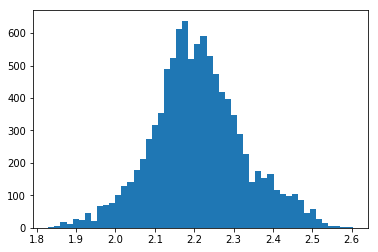

m_est, m_err: 2.209837764197852 0.1177939800278897


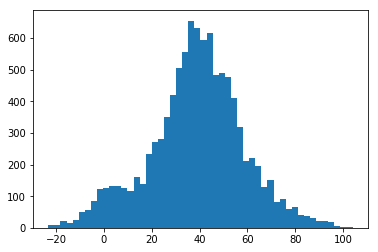

b_est, b_err: 38.77505769252546 19.695215518831215


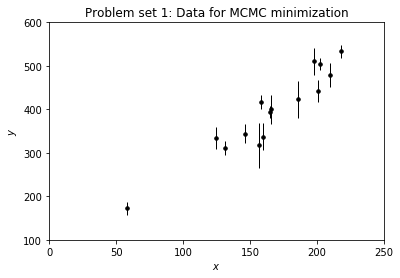

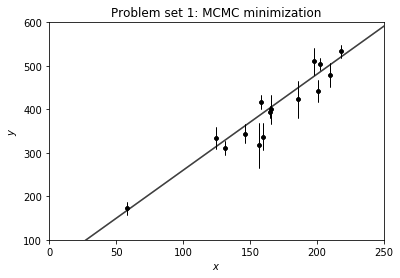

In [18]:
# This block executes when you run "python wrapper.py".
if __name__ == '__main__':
	#problem1() # Check that this works
	#uncomment this when you are ready to do problem 2.
    MHP()